In [20]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5, 10, 15, 20, 25, 30]
range_list = [i*scale for i in range_list]
period = '2y'
interval = '1h'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

[*********************100%***********************]  1 of 1 completed
Start TA-LIB module
created indicators columns with TA-LIB


In [21]:
df = data.df.copy()
#bt.bt_plot_indicators(df, "Bitcoin")
df.tail()

,ad,adj_close,adx_10,adx_15,adx_20,adx_25,adx_30,adx_5,atrr_10,atrr_15,...,willr_30,willr_5,wma_10,wma_15,wma_20,wma_25,wma_30,wma_5,d_r,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-12 19:00:00+00:00,-283878055151529.0000,16871.0000,12.3125,14.1849,14.8054,15.6922,17.2169,17.3482,84.6379,109.0740,...,-58.6489,-70.2678,16871.4996,16860.1741,16850.8072,16850.5803,16849.3037,16873.5647,0.0009,0.0000
2022-11-12 20:00:00+00:00,-283878055151529.0000,16816.0273,12.2789,14.0623,14.6965,15.5898,17.1037,18.9646,82.9905,106.3467,...,-57.4087,-93.4774,16862.6895,16857.7810,16848.2383,16848.3730,16847.2243,16851.7243,-0.0033,1.0000
2022-11-12 21:00:00+00:00,-283878053863638.8125,16814.3945,12.6481,14.0769,14.6511,15.5233,17.0141,22.2861,79.0016,102.1303,...,-57.7827,-76.8633,16853.7920,16853.9658,16845.8132,16846.0663,16845.2436,16836.0868,-0.0001,0.0000
2022-11-12 22:00:00+00:00,-283878053863638.8125,16815.8516,12.9805,14.0905,14.6080,15.4596,16.9275,24.9432,71.2472,95.4188,...,-57.4490,-73.0343,16845.9434,16849.8824,16843.8770,16843.4332,16843.4564,16825.4796,0.0001,0.0000
2022-11-12 22:01:00+00:00,-283878053863638.8125,16814.2441,13.3242,14.1170,14.5731,15.4016,16.8458,27.3250,64.2832,89.1647,...,-57.8171,-73.6316,16838.2887,16845.3361,16842.1649,16840.5931,16841.5459,16818.7243,-0.0001,1.0000


In [22]:
pure_df = data.get_symbol_df(SYMBOL, pure=True)
pure_df.head()

,open,high,low,close,adj_close,volume
Datetime,,,,,,
2020-11-12 22:00:00+00:00,16139.5713,16298.7480,16133.6465,16220.6162,16220.6162,0
2020-11-12 23:00:00+00:00,16215.2451,16305.0039,16190.5830,16276.2188,16276.2188,427466752
2020-11-13 00:00:00+00:00,16276.4404,16415.4141,16276.4404,16388.4961,16388.4961,129804288
2020-11-13 01:00:00+00:00,16388.3848,16456.7305,16367.9160,16422.4004,16422.4004,538089472
2020-11-13 02:00:00+00:00,16422.3105,16463.1777,16369.4238,16402.7246,16402.7246,493977600


In [23]:
from technical_analysis.indicators import Indicators
ind = Indicators(pure_df, range_list)
ind.create_ind_cols_ta()
test = ind.df
test.tail()

,open,high,low,close,adj_close,volume,SMA_5,lowband_5,midband_5,upband_5,...,stoch_d,ich_kline,ich_tline,fishert,fisherts,AD,OBV,candle_label,candlestick_pattern,log_rt
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-12 19:00:00+00:00,16857.8652,16879.9531,16844.2520,16871.0000,16871.0000,0,16881.5484,16840.7948,16881.5484,16922.3021,...,80.9888,16848.3740,16870.5723,0.8014,1.1640,-283878055151529.0000,-1157796848336992.0000,0,NO_PATTERN,0.0009
2022-11-12 20:00:00+00:00,16873.0527,16875.7285,16807.5645,16816.0273,16816.0273,0,16861.3070,16811.9348,16861.3070,16910.6793,...,68.7266,16848.3740,16870.5723,0.3849,0.8014,-283878055151529.0000,-1157796848336992.0000,0,NO_PATTERN,-0.0033
2022-11-12 21:00:00+00:00,16816.8789,16833.8145,16790.7129,16814.3945,16814.3945,13025280,16847.6734,16792.0559,16847.6734,16903.2910,...,51.9401,16848.3740,16870.5723,-0.1622,0.3849,-283878053863638.8125,-1157796861362272.0000,0,NO_PATTERN,-0.0001
2022-11-12 22:00:00+00:00,16815.8516,16815.8516,16815.8516,16815.8516,16815.8516,0,16834.5098,16786.7010,16834.5098,16882.3185,...,29.2169,16859.2256,16873.8262,-0.6787,-0.1622,-283878053863638.8125,-1157796861362272.0000,0,NO_PATTERN,0.0001
2022-11-12 22:01:00+00:00,16814.2441,16814.2441,16814.2441,16814.2441,16814.2441,0,16826.3035,16781.5833,16826.3035,16871.0237,...,11.9984,16859.2256,16873.8262,-1.1612,-0.6787,-283878053863638.8125,-1157796861362272.0000,0,NO_PATTERN,-0.0001


In [24]:
test.shape, df.shape
test.columns = test.columns.str.lower()
for i in test.columns.to_list():
    if i not in df.columns.to_list():
        print(i)

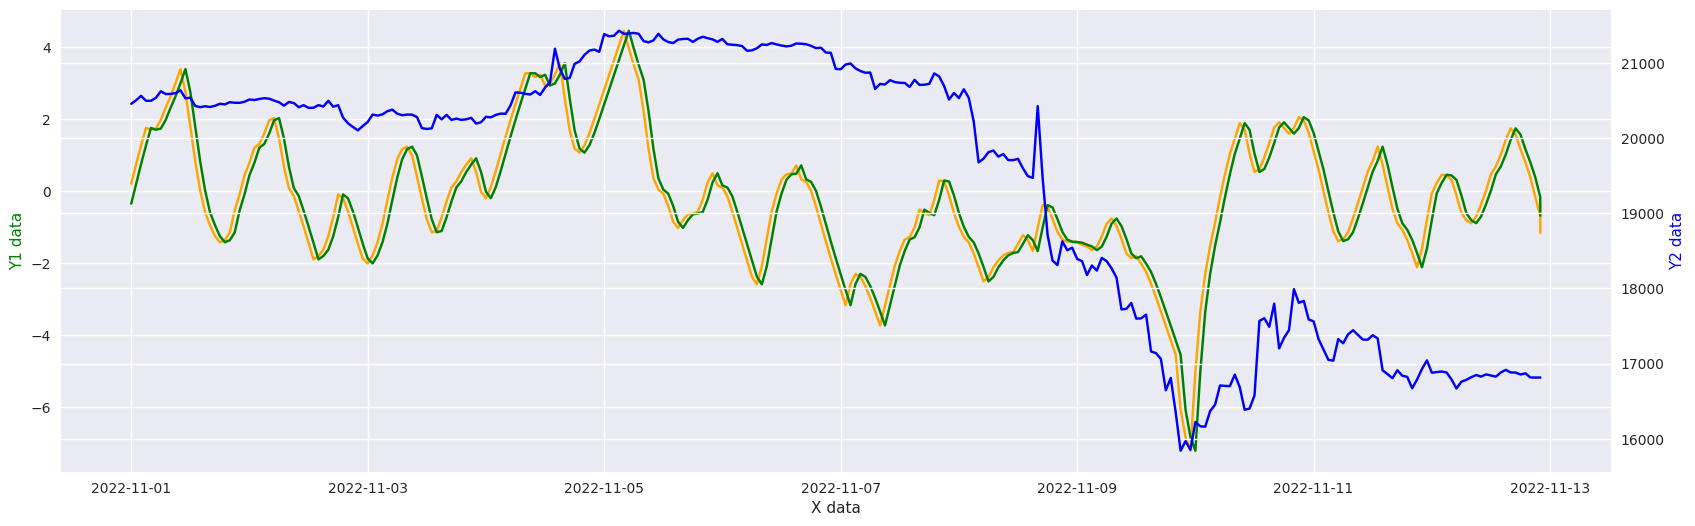

In [38]:
import matplotlib.pyplot as plt
testdf = test['2022-11':].copy()
fig, ax1 = plt.subplots(figsize=(20,6))

ax2 = ax1.twinx()
ax1.plot(testdf.index, testdf.fishert, 'orange')
ax1.plot(testdf.index, testdf.fisherts, 'g-')
ax2.plot(testdf.index, testdf.close, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [34]:
df.fishert[df.fisherts < -7]

Datetime
2022-04-12 00:00:00+00:00   -7.4283
2022-04-12 01:00:00+00:00   -7.5143
2022-04-12 02:00:00+00:00   -7.5574
2022-04-12 03:00:00+00:00   -5.2157
2022-11-10 00:00:00+00:00   -5.0237
Name: fishert, dtype: float64

In [35]:
df.fisherts.tail()

Datetime
2022-11-12 19:00:00+00:00    1.1640
2022-11-12 20:00:00+00:00    0.8014
2022-11-12 21:00:00+00:00    0.3849
2022-11-12 22:00:00+00:00   -0.1622
2022-11-12 22:01:00+00:00   -0.6787
Name: fisherts, dtype: float64